<a href="https://colab.research.google.com/github/dolmani38/BLE-signal-collision-simulation/blob/main/packet_collision_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BLE Advertisement packet collision simulation / experiment

In [40]:
import matplotlib.pyplot as plt
import sys
from typing import MappingView

##1. poisson 분포를 적용한 논문의 모델

* 참고 논문 (https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8443321)

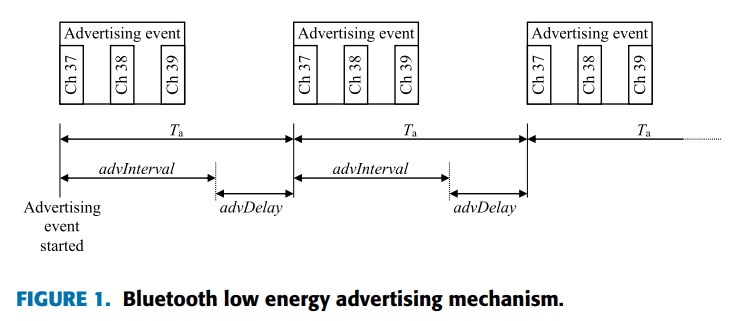

### IV. BLUETOOTH LOW ENERGY COLLISION ANALYSIS
In this section, we analyze the probability of packet collisions. In order to do the collision analysis, we initially
make a number of assumptions as follows: <br>
    1. advertising nodes attempt to transmit according to a Poisson distribution (https://en.wikipedia.org/wiki/Poisson_distribution);<br>
    2. advDelay is considered constant (as expectation of random delays); <br>
    3. advertising channel packet duration (dp) for all three advertising channels (channel index = 37, 38, 39) is fixed; <br>
    4. the time duration that an advertiser requires to change its channel (dg) is constant; <br>
    5. for simulation, we did not consider any distortions from the channel; <br>
    6. any number of packets that collide in one time interval is considered one collision.<br>


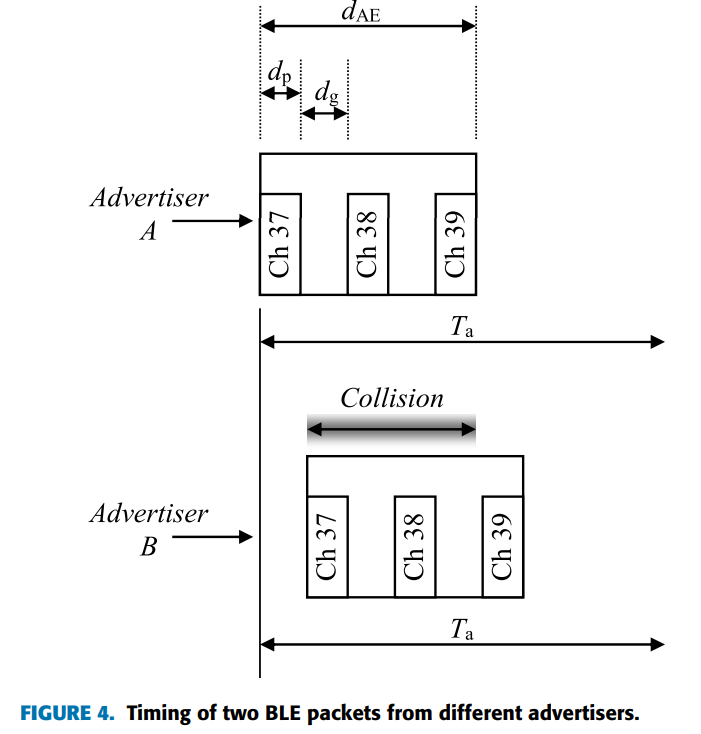

### packet collision probability model

$$
\begin{align}
P_c(n) = 1 - e^{-n \lambda 2d_p }
\tag{4}
\end{align}
$$

\begin{align}
\lambda = \dfrac{1}{advInterval + advDelay}
\tag{5}
\end{align}

* 근데, 왜 2 dp ???
* -n * lambda * 2 * dp 에서 - 의 이유???

In [41]:
sys.float_info.epsilon

2.220446049250313e-16

### 일단 결과에 맞춘다...

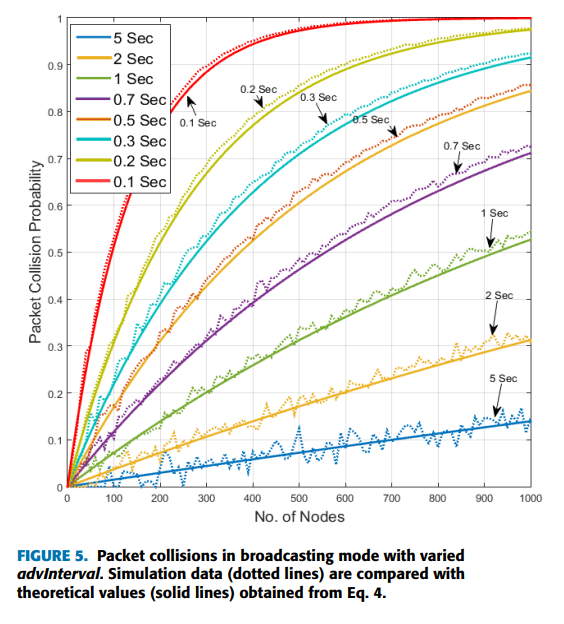

In [42]:
# Poisson distribution model

import sys

def poisson_function2(node_count=100,advInterval =5000):
    
    advDelay = 5
    #lambda1 = 1/(advInterval+advDelay)
    alpha = -12/376
    #print(lambda1)
    # https://infocenter.nordicsemi.com/index.jsp?topic=%2Fsds_s140%2FSDS%2Fs1xx%2Fble_processor_avail_interrupt_latency%2Fble_broadcaster_performance.html
    # advertising 175us ???
    dp = 0.376  # 12us    
    return  1-sys.float_info.epsilon**(-node_count * lambda1 * 2 * dp * alpha)

In [43]:

def collision_simulation3(signal_count=100,advInterval =5000):
    collision = []
    #collision.append(0.0)
    #collision.append(0.0)
    for i in range(0,signal_count):
        c = poisson_function2(node_count=i,advInterval =advInterval)
        if (c < signal_count):
            collision.append(c)
        else:
            print(f"{i}개 운영의 경우, {collision[-1]:.4f}개의 충돌 예측. 즉, 상시 충돌 상황.")
            break

    print(f"{signal_count}개 운영의 경우, {collision[-1]*i:.4f}개의 충돌 예측. 충돌 확률 {collision[-1]*100:.4f}%")
    plt.plot(collision,label='poisson model (paper)')
    plt.legend()
    return collision

100개 운영의 경우, 1.6796개의 충돌 예측. 충돌 확률 1.6965%


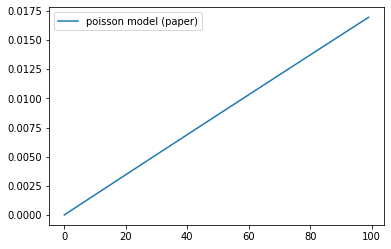

In [44]:
poisson_model_2 = collision_simulation3(signal_count=100,advInterval = 100)

1000개 운영의 경우, 158.4210개의 충돌 예측. 충돌 확률 15.8580%


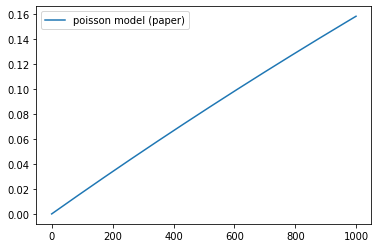

In [45]:
poisson_model_2 =collision_simulation3(signal_count=1000,advInterval = 100)

100개 운영의 경우, 1.6796개의 충돌 예측. 충돌 확률 1.6965%


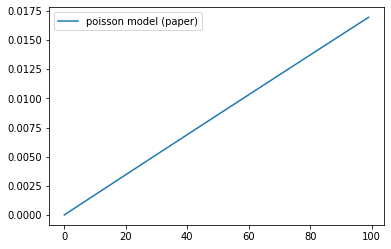

In [46]:
poisson_model_2 =collision_simulation3(signal_count=100)

500개 운영의 경우, 41.2329개의 충돌 예측. 충돌 확률 8.2631%


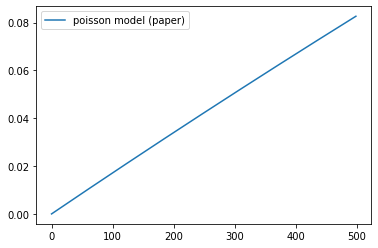

In [47]:
poisson_model_2 =collision_simulation3(signal_count=500)

1000개 운영의 경우, 158.4210개의 충돌 예측. 충돌 확률 15.8580%


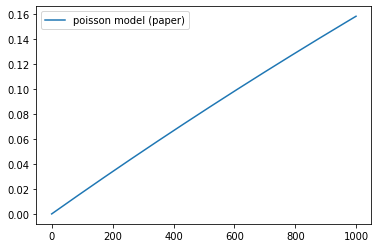

In [48]:
poisson_model_2 =collision_simulation3(signal_count=1000)

5000개 운영의 경우, 2892.0799개의 충돌 예측. 충돌 확률 57.8532%


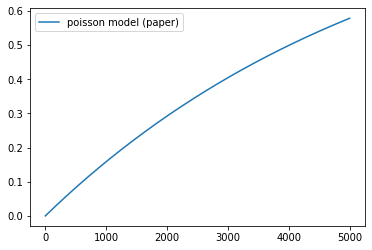

In [49]:
poisson_model_2 =collision_simulation3(signal_count=5000)

10000개 운영의 경우, 8223.1291개의 충돌 예측. 충돌 확률 82.2395%


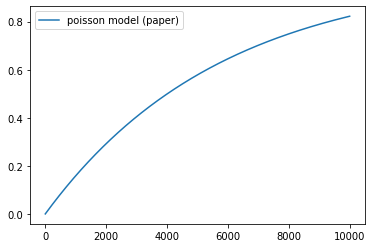

In [50]:
poisson_model_2 =collision_simulation3(signal_count=10000)

20000개 운영의 경우, 19368.2709개의 충돌 예측. 충돌 확률 96.8462%


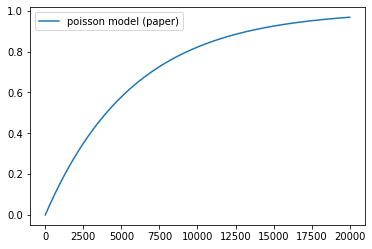

In [51]:
poisson_model_2 =collision_simulation3(signal_count=20000)

## 2. packet loss율 측정 실험 결과의 대입

+ Data 확보 : 2023년 2월17일 ~ 2023년 2월 20일
+ 확보된 데이터 수 : 66,354건 
+ 최대 인식 소요 시간 : 1.390ms (1초 이상 94건, 1초 이하 66,260건)
+ 최소 인식 소요 시간 : 15ms / 평균 인식 소요 시간 : 180ms
+ 0.5초 이상 지연 138건
+ 0.5초 이상 지연을 - 충돌로 가정! 

In [52]:
# 측정 결과 인식율
# 1초 이상, 미인식으로 간주

p = (66354-138)/66354
print('실측 인식율',p)
print('충돌 확율', f'{(1-p)*100:.4f}%')

실측 인식율 0.997920245953522
충돌 확율 0.2080%


1500개 운영의 경우, 342.1324개의 충돌 예측. 충돌 확률 22.8240%


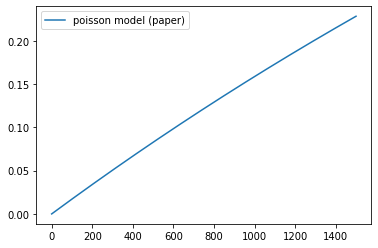

In [53]:
# 논문의 수식에 의한 이론적 충돌 확률
# 운영 센서개수 = 1500
# 운영 센서의 advInterval = 5000 그대로
# 그외 변수 및 보정 상수들은 그대로...

poisson_model_2 =collision_simulation3(signal_count=1500)

## 수식의 보정
+ 논문의 수식에 의한 1500개 센서 운영 조건에서 이론적 충돌 확률은 22.8240%
+ 실측 충돌 확률은 0.2080% 로서
+ 이론과 실측은 약 100배의 차이 발생 
+ 이론의 수식에서 이에 대한 보정 상수 조정

In [54]:

def poisson_function3(node_count=100,advInterval =5000):
    
    advDelay = 5
    #lambda1 = 1/(advInterval+advDelay)
    alpha = -12/47000
    #print(lambda1)
    # https://infocenter.nordicsemi.com/index.jsp?topic=%2Fsds_s140%2FSDS%2Fs1xx%2Fble_processor_avail_interrupt_latency%2Fble_broadcaster_performance.html
    # advertising 175us ???
    dp = 0.376  # 12us    
    return  1-sys.float_info.epsilon**(-node_count * lambda1 * 2 * dp * alpha)


In [55]:

def collision_simulation4(signal_count=100,advInterval =5000):
    collision = []
    #collision.append(0.0)
    #collision.append(0.0)
    for i in range(0,signal_count):
        c = poisson_function3(node_count=i,advInterval =advInterval)
        if (c < signal_count):
            collision.append(c)
        else:
            print(f"{i}개 운영의 경우, {collision[-1]:.4f}개의 충돌 예측. 즉, 상시 충돌 상황.")
            break

    print(f"{signal_count}개 운영의 경우, {collision[-1]*i:.4f}개의 충돌 예측. 충돌 확률 {collision[-1]*100:.4f}%")
    plt.plot(collision,label='poisson model (paper)')
    plt.legend()
    return collision

1500개 운영의 경우, 3.1037개의 충돌 예측. 충돌 확률 0.2071%


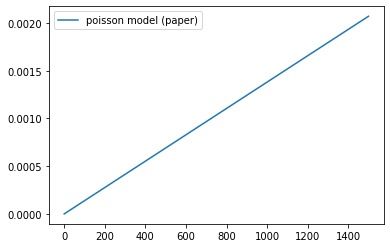

In [56]:
# 논문의 수식에 의한 이론적 충돌 확률
# 운영 센서개수 = 1500
# 운영 센서의 advInterval = 5000 그대로
# 그외 변수 및 보정 상수들은 그대로...

poisson_model_2 =collision_simulation4(signal_count=1500)

+ 실험의 경우 1초 후, 실 운영의 경우 5초 후에 대한 확률을 계산할지가 문제!
+ 만약 advInterval 가 1초, 5초 + random 이면, 산출된 확률 값에 제곱 

In [59]:
poisson_model_2[-1] **2

4.287016751368709e-06

+ 일단 실험에서 1초 이상이 94건이니... 이를 기준으로 계산 하면

In [60]:
# 2차 adv 신호까지 collision 확률
p = (66354-94)/66354
print('실측 인식율',p)
print('충돌 확율', f'{(1-p)*100:.4f}%')

실측 인식율 0.9985833559393555
충돌 확율 0.1417%


In [65]:
r = (1-p) / poisson_model_2[-1]
r

0.6842001339958296

In [66]:
# 최종 충돌 확률 함수

def collision_simulation5(signal_count=100,advInterval =5000):
    collision = []
    #collision.append(0.0)
    #collision.append(0.0)
    for i in range(0,signal_count):
        c = poisson_function3(node_count=i,advInterval =advInterval)
        c = c * 0.6842001339958296
        if (c < signal_count):
            collision.append(c)
        else:
            print(f"{i}개 운영의 경우, {collision[-1]:.4f}개의 충돌 예측. 즉, 상시 충돌 상황.")
            break

    print(f"{signal_count}개 운영의 경우, {collision[-1]*i:.4f}개의 충돌 예측. 충돌 확률 {collision[-1]*100:.4f}%")
    plt.plot(collision,label='poisson model (paper)')
    plt.legend()
    return collision

1500개 운영의 경우, 2.1235개의 충돌 예측. 충돌 확률 0.1417%


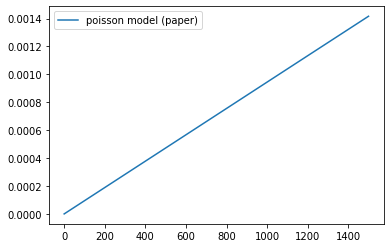

In [67]:
poisson_model_2 =collision_simulation5(signal_count=1500)

## 2공장 3000개 기준 충돌 확률 추정

3000개 운영의 경우, 8.4911개의 충돌 예측. 충돌 확률 0.2831%


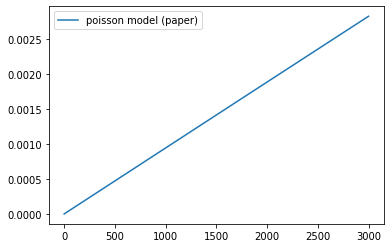

In [68]:
poisson_model_2 =collision_simulation5(signal_count=3000)